In [1]:
# Imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
## Loading in Data

# Top 200 song consumption
df = pd.read_csv('../../raw_data/beema/cleaned_data/top_200_song_consumption_cleaned.csv')

# Group by 'Song' and keep the row with the highest 'Weeks On Chart'
unique_songs = df.loc[df.groupby('Song')['Weeks On Chart'].idxmax()]
unique_songs = unique_songs.reset_index(drop=True)

# Top 25% of Weeks on Chart
top_songs = unique_songs[unique_songs['Weeks On Chart'] >= 20]

# Bottom 75% of Weeks on Chart
bottom_songs = unique_songs[unique_songs['Weeks On Chart'] < 20]

# Camille's large dataset
all_songs = pd.read_csv('../../raw_data/camille/top_spotify_songs.csv')
# Drop duplicates
#all_songs = all_songs.drop_duplicates(subset=['name'])
# Add duration in s: convert ms to seconds
#all_songs['duration_s'] = all_songs['duration_ms'] / 1000
# Merge two datasets
merged_dataset_top_25 = pd.merge(top_songs, all_songs, how='inner', left_on='Song', right_on='songs')
#merged_dataset_top_25.drop(columns='lyrics', inplace=True)

# Columns to be used for analysis later
song_features = [
    "danceability",
    "energy",
    "loudness",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    #"duration_s"
]

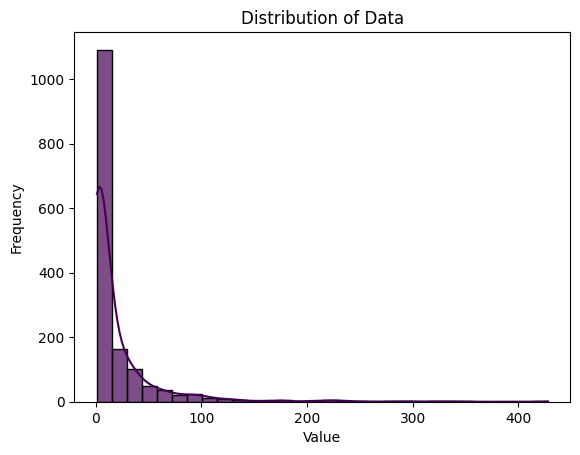

Summary stats:
 count    1543.000000
mean       19.156189
std        38.582145
min         1.000000
25%         1.000000
50%         4.000000
75%        20.000000
max       428.000000
Name: Weeks On Chart, dtype: float64


In [4]:
## Distribution of number of Weeks On Chart

# Data
data = unique_songs['Weeks On Chart']

# Create the plot
# plt.figure(figsize=(16, 8)) # Change if needed
sns.histplot(data, bins=30, kde=True, color='#440154', alpha=0.7)  # kde=True adds a density curve
plt.title('Distribution of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

# Summary stats of distribution
print('Summary stats:\n', data.describe())

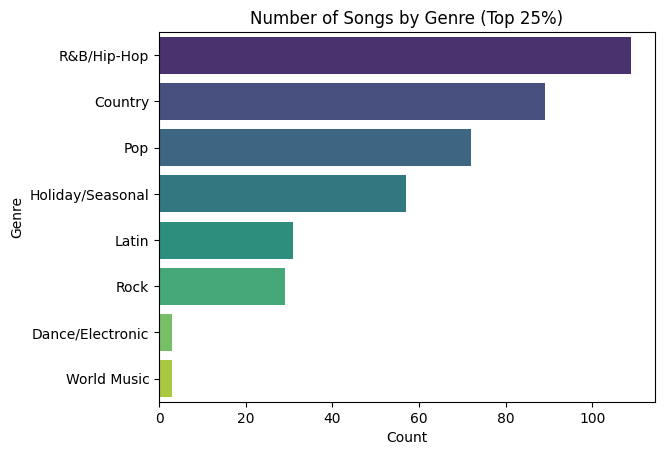

In [5]:
## Count of Genres in the Top 25% of Weeks On Chart

data_genre = top_songs.groupby('Genre')['Song'].count()

# Reset index to convert the Series to a DataFrame
data_genre_df = data_genre.reset_index()
data_genre_df.columns = ['Genre', 'Count']
data_genre_df = data_genre_df.sort_values(by='Count', ascending=False)

# Create the bar plot
sns.barplot(x='Count', y='Genre', data=data_genre_df, hue='Genre', palette='viridis', dodge=False)

# Add title and labels
# plt.figure(figsize=(16, 8)) # Change if needed
plt.title('Number of Songs by Genre (Top 25%)')
plt.xlabel('Count')
plt.ylabel('Genre')

# Show the plot
plt.show()

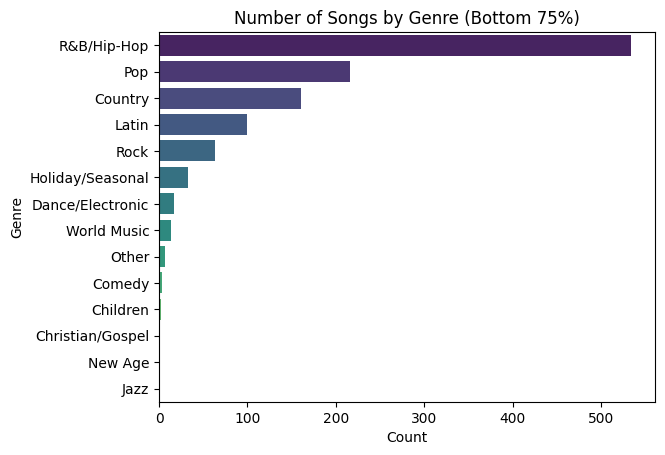

In [6]:
## Count of Genres in the Bottom 75% of Weeks On Chart

data_genre = bottom_songs.groupby('Genre')['Song'].count()

# Reset index to convert the Series to a DataFrame
data_genre_df = data_genre.reset_index()
data_genre_df.columns = ['Genre', 'Count']
data_genre_df = data_genre_df.sort_values(by='Count', ascending=False)

# Create the bar plot
sns.barplot(x='Count', y='Genre', data=data_genre_df, hue='Genre', palette='viridis', dodge=False)

# Add title and labels
# plt.figure(figsize=(16, 8)) # Change if needed
plt.title('Number of Songs by Genre (Bottom 75%)')
plt.xlabel('Count')
plt.ylabel('Genre')

# Show the plot
plt.show()

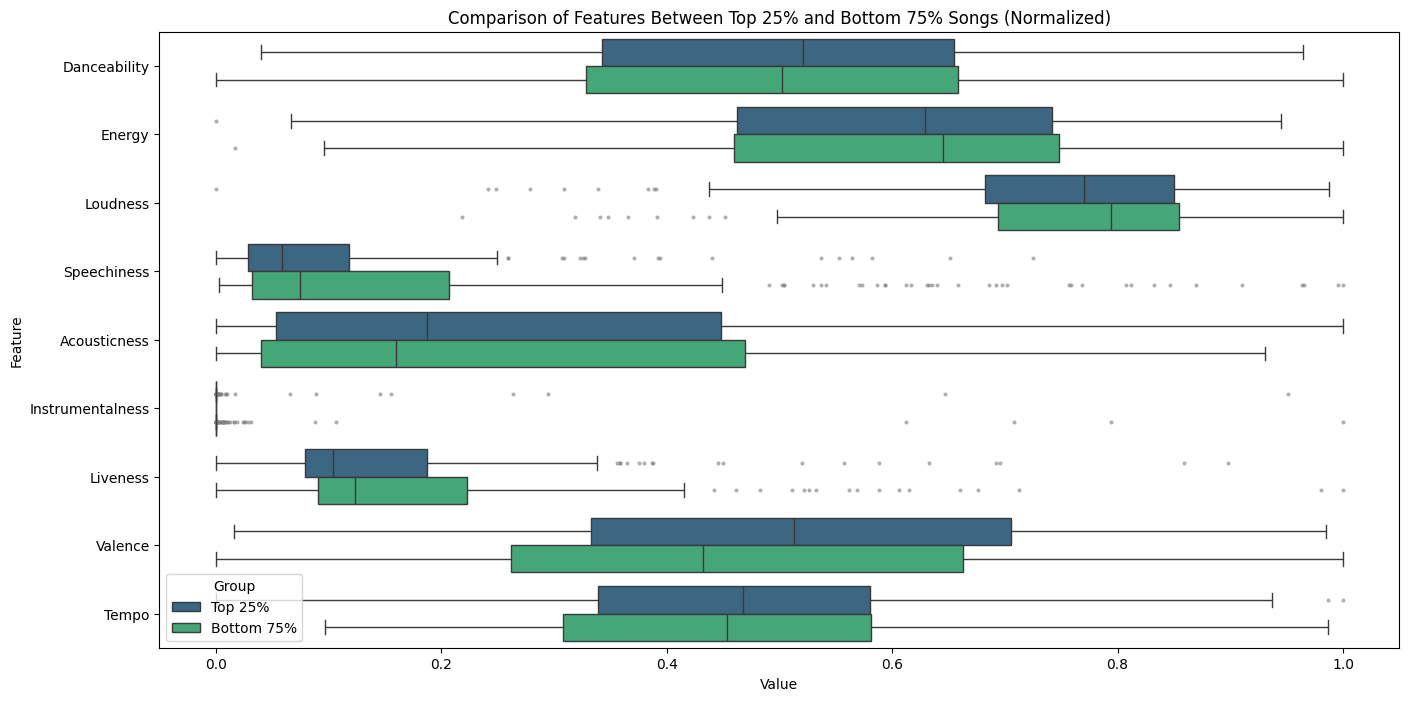

In [12]:
## Similar features between Top 25% and Bottom 75% Charted Songs

# Combine both datasets before normalization
top_songs_merged = merged_dataset_top_25[song_features]
bottom_songs_merged = all_songs.loc[all_songs['songs'].isin(bottom_songs['Song']), song_features]

# Ensure consistent normalization
all_data = pd.concat([top_songs_merged, bottom_songs_merged])

# Normalize using MinMaxScaler
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(all_data), columns=song_features)

# Split back into respective groups
normalized_top_songs = normalized_data.iloc[:len(top_songs_merged), :].copy()
normalized_bottom_songs = normalized_data.iloc[len(top_songs_merged):, :].copy()

# Melt datasets to make them easier to visualize
top_songs_melted = normalized_top_songs.melt(var_name='Feature', value_name='Value')
bottom_songs_melted = normalized_bottom_songs.melt(var_name='Feature', value_name='Value')

# Add a group column
top_songs_melted['Group'] = 'Top 25%'
bottom_songs_melted['Group'] = 'Bottom 75%'

# Combine the datasets
combined_data = pd.concat([top_songs_melted, bottom_songs_melted])

# Capitalize the first letter of each feature
combined_data['Feature'] = combined_data['Feature'].str.capitalize()

# Create box plots
plt.figure(figsize=(16, 8))
sns.boxplot(
    data=combined_data, 
    x='Value', 
    y='Feature', 
    hue='Group',
    flierprops={
        'marker':'o', 
        'markersize':2,  # Smaller marker size
        'alpha':0.5,     # Add some transparency
        'markerfacecolor':'gray', 
        'markeredgecolor':'gray'
    },
    palette='viridis'
)
plt.title(r'Comparison of Features Between Top 25% and Bottom 75% Songs (Normalized)')
plt.show()

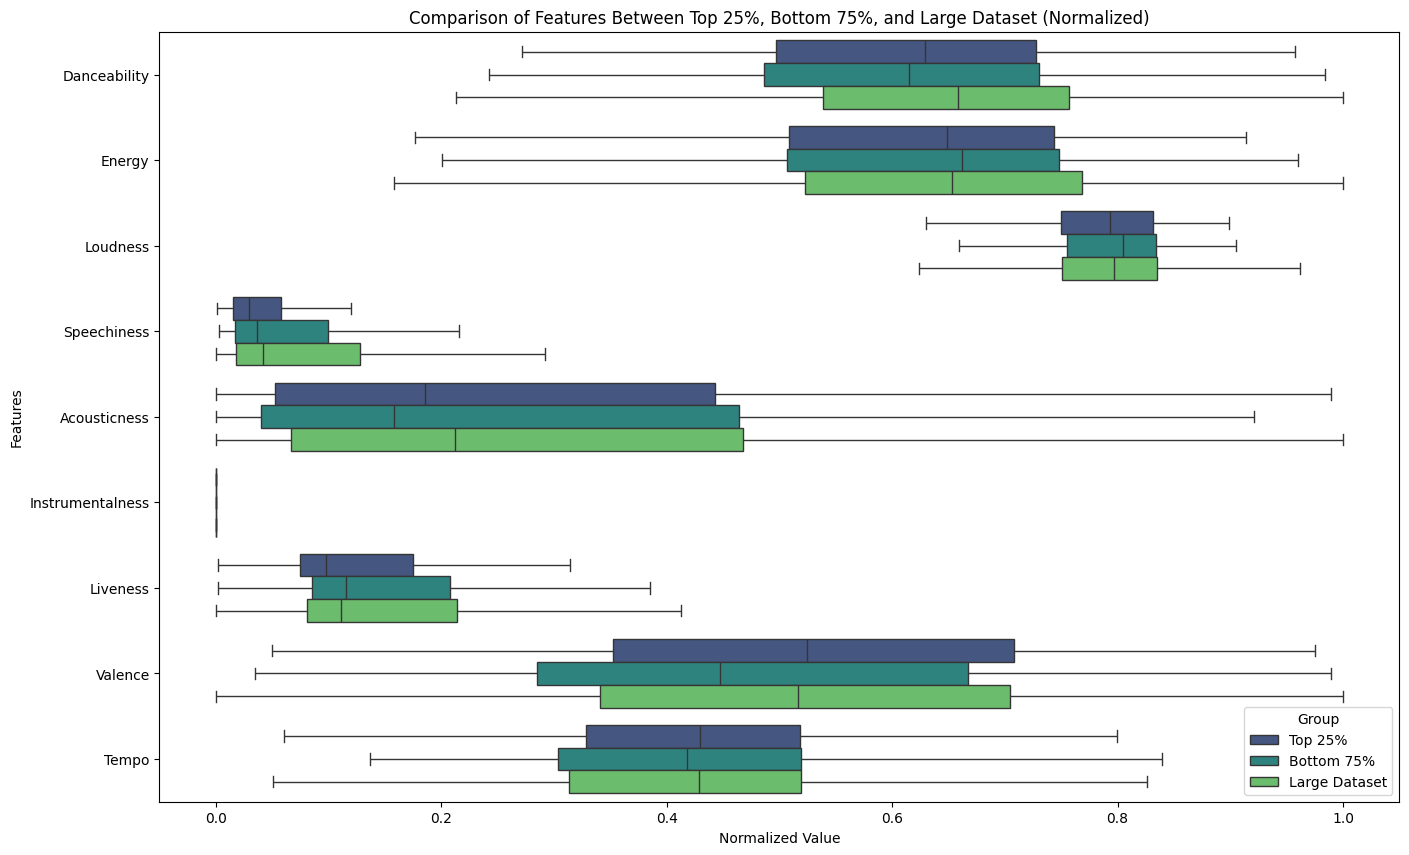

In [13]:
## Similarity of all three sets

# Combine all datasets before normalization
top_songs_merged = merged_dataset_top_25[song_features]
bottom_songs_merged = all_songs.loc[all_songs['songs'].isin(bottom_songs['Song']), song_features]
large_dataset = all_songs[song_features]

# Ensure consistent normalization
all_data = pd.concat([top_songs_merged, bottom_songs_merged, large_dataset])

# Normalize using MinMaxScaler
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(all_data), columns=song_features)

# Split back into respective groups
normalized_top_songs = normalized_data.iloc[:len(top_songs_merged), :].copy()
normalized_bottom_songs = normalized_data.iloc[len(top_songs_merged):len(top_songs_merged) + len(bottom_songs_merged), :].copy()
normalized_large_dataset = normalized_data.iloc[len(top_songs_merged) + len(bottom_songs_merged):, :].copy()

# Melt datasets to make them easier to visualize
top_songs_melted = normalized_top_songs.melt(var_name='Feature', value_name='Value')
bottom_songs_melted = normalized_bottom_songs.melt(var_name='Feature', value_name='Value')
large_dataset_melted = normalized_large_dataset.melt(var_name='Feature', value_name='Value')

# Add a group column
top_songs_melted['Group'] = 'Top 25%'
bottom_songs_melted['Group'] = 'Bottom 75%'
large_dataset_melted['Group'] = 'Large Dataset'

# Combine the datasets
combined_data = pd.concat([top_songs_melted, bottom_songs_melted, large_dataset_melted])

# Capitalize the first letter of each feature
combined_data['Feature'] = combined_data['Feature'].str.capitalize()

# Create box plots
plt.figure(figsize=(16, 10))
sns.boxplot(
    data=combined_data, 
    x='Value', 
    y='Feature', 
    hue='Group',
    showfliers=False, # Remove outliers
    palette='viridis'
)
plt.title(r'Comparison of Features Between Top 25%, Bottom 75%, and Large Dataset (Normalized)')
plt.xlabel('Normalized Value')
plt.ylabel('Features')
plt.show()

In [14]:
## Load data

df = pd.read_csv('../../raw_data/beema/cleaned_data/top_200_song_consumption_cleaned.csv')

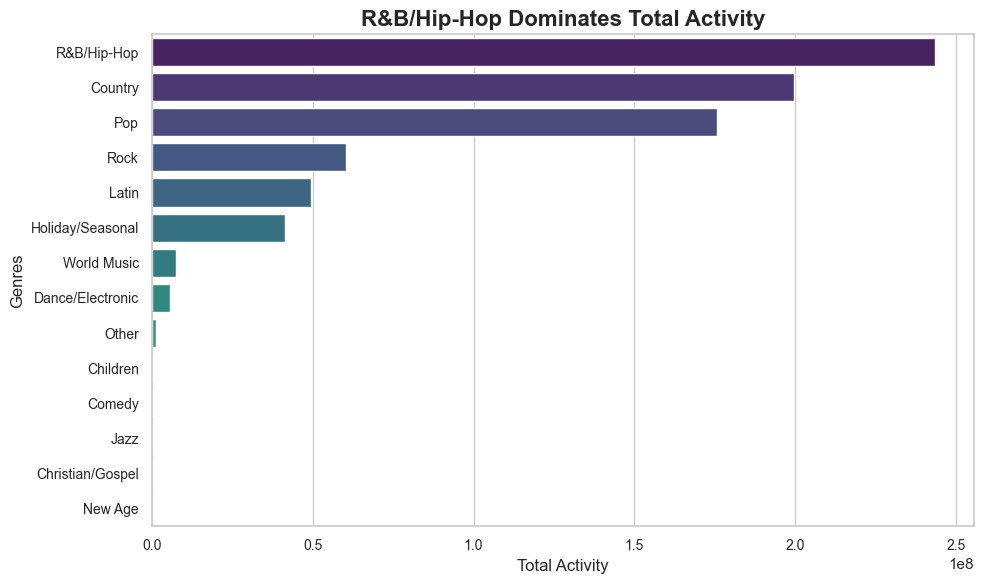

In [15]:
## Bar graph for Genres vs. Total Activity

activity_by_genre = df.groupby('Genre')['TW Total Activity'].sum().sort_values(ascending=False)

# Convert Series to DataFrame for Seaborn
activity_df = activity_by_genre.reset_index()
activity_df.columns = ['Genre', 'Total Activity']

# Seaborn barplot template
def create_bar_chart(data, x_column, y_column, title, x_label, y_label):
    sns.set(style="whitegrid")  # Set the style for the plot
    plt.figure(figsize=(10, 6))  # Set the figure size
    
    # Create the barplot
    sns.barplot(data=data, x=x_column, y=y_column, hue=y_column, palette="viridis")
    
    # Add customizations
    plt.title(title, fontsize=16, weight='bold')  # Set the title
    plt.xlabel(x_label, fontsize=12)  # Set x-axis label
    plt.ylabel(y_label, fontsize=12)  # Set y-axis label
    plt.xticks(fontsize=10)  # Adjust x-axis ticks
    plt.yticks(fontsize=10)  # Adjust y-axis ticks
    plt.tight_layout()  # Adjust layout to fit nicely
    
    # Show the plot
    plt.show()

# Use the template
create_bar_chart(
    data=activity_df,
    x_column='Total Activity',
    y_column='Genre',
    title='R&B/Hip-Hop Dominates Total Activity',
    x_label='Total Activity',
    y_label='Genres'
)

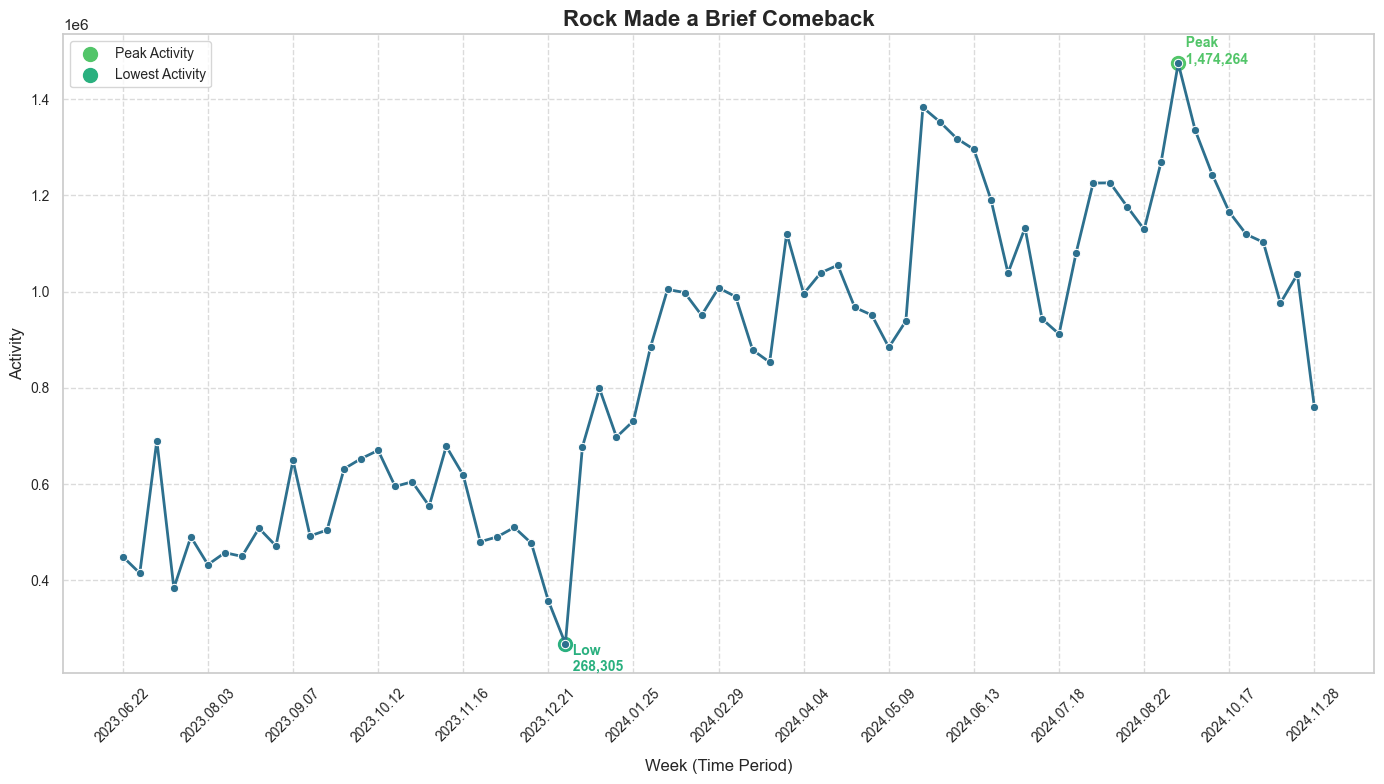

In [49]:
## Line graph for Rock Activity over Time

rock_over_time = df[df['Genre'] == 'Rock'].groupby('week_of')['TW Total Activity'].sum()

# Convert Series to DataFrame for Seaborn
rock_over_time_df = rock_over_time.reset_index()
rock_over_time_df.columns = ['Week', 'Total Activity']

def create_line_graph(data, x_column, y_column, title, x_label, y_label):
    sns.set(style="whitegrid") 
    plt.figure(figsize=(14, 8)) 
    
    # Plot the line graph
    sns.lineplot(
        data=data,
        x=x_column,
        y=y_column,
        marker='o',
        color='#2d708e',
        linewidth=2
    )
    
    # Highlight special points (e.g., peaks and troughs)
    max_point = data[data[y_column] == data[y_column].max()]
    min_point = data[data[y_column] == data[y_column].min()]
    plt.scatter(max_point[x_column], max_point[y_column], color='#52c569', s=100, label='Peak Activity')
    plt.scatter(min_point[x_column], min_point[y_column], color='#2ab07f', s=100, label='Lowest Activity')
    
    # Annotate special points
    for _, row in max_point.iterrows():
        plt.text(row[x_column], row[y_column], f'  Peak\n  {int(row[y_column]):,}', color='#52c569', fontsize=10, weight='bold', ha='left')
    for _, row in min_point.iterrows():
        plt.text(row[x_column], row[y_column], f'  Low\n  {int(row[y_column]):,}', color='#2ab07f', fontsize=10, weight='bold', ha='left', va='top')

    # Optimize x-axis ticks (e.g., show every 5th week)
    tick_step = 5
    ticks = data[x_column][::tick_step]
    plt.xticks(ticks=ticks, labels=ticks, fontsize=10, rotation=45)
    
    # Add customizations
    plt.title(title, fontsize=16, weight='bold')  
    plt.xlabel(x_label, fontsize=12, labelpad=10) 
    plt.ylabel(y_label, fontsize=12)
    plt.xticks(fontsize=10, rotation=45)  
    plt.yticks(fontsize=10)
    
    # Add a legend
    plt.legend(loc='upper left', fontsize=10)
    
    # Add grid and tight layout
    plt.grid(visible=True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Use the updated template
create_line_graph(
    data=rock_over_time_df,
    x_column='Week',
    y_column='Total Activity',
    title='Rock Made a Brief Comeback',
    x_label='Week (Time Period)',
    y_label='Activity'
)

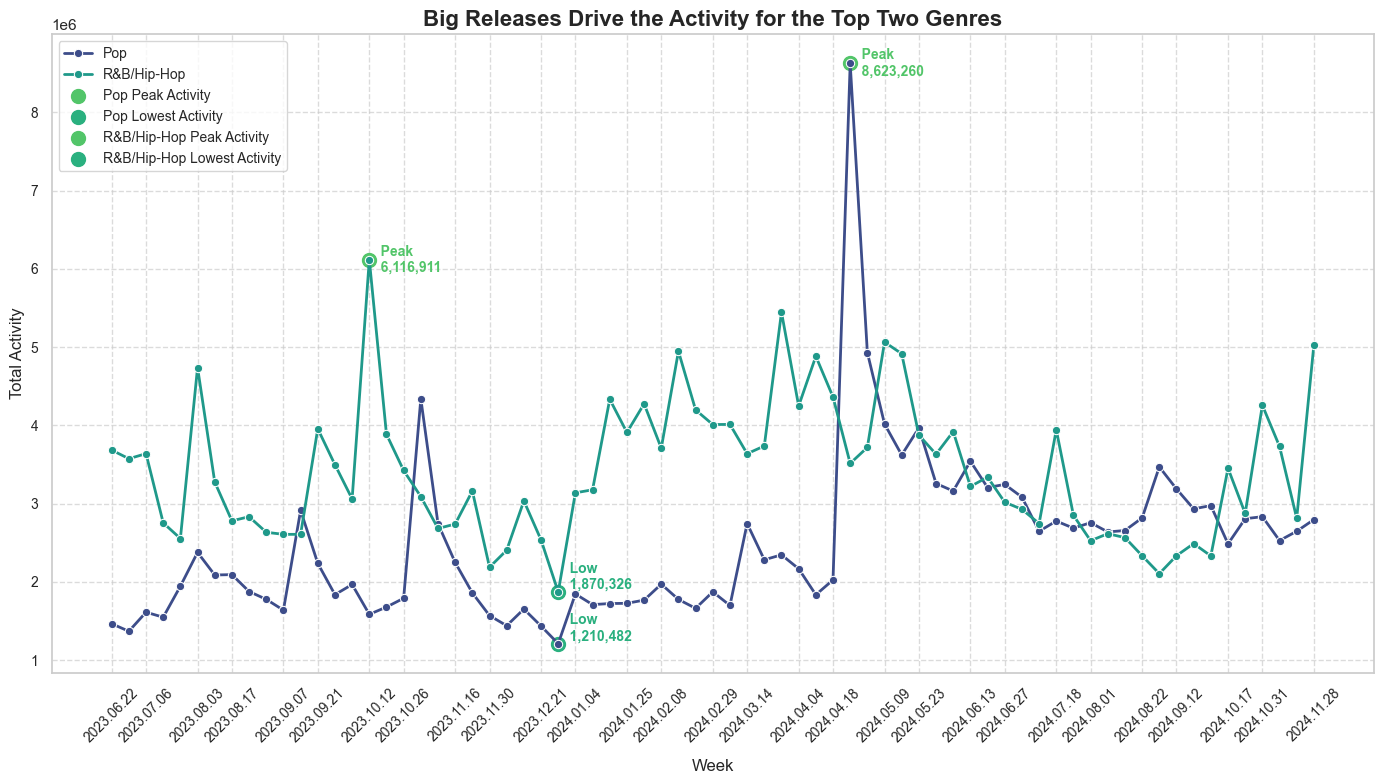

In [63]:
# Group data by week_of and Genre
activity_over_time = df[df['Genre'].isin(['Pop', 'R&B/Hip-Hop'])].groupby(['week_of', 'Genre'])['TW Total Activity'].sum().reset_index()

def create_multi_genre_line_graph(data, x_column, y_column, hue_column, title, x_label, y_label):
    sns.set(style="whitegrid")  
    plt.figure(figsize=(14, 8))  

    # Create the line plot with hue for multiple lines
    sns.lineplot(
        data=data, 
        x=x_column, 
        y=y_column, 
        hue=hue_column, 
        marker='o',
        linewidth=2,
        palette=['#3d4d8a', '#1f998a']
    )

    # Highlight peak and lowest points for each genre
    for genre in data[hue_column].unique():
        genre_data = data[data[hue_column] == genre]
        max_point = genre_data[genre_data[y_column] == genre_data[y_column].max()]
        min_point = genre_data[genre_data[y_column] == genre_data[y_column].min()]
        
        # Scatter points for peak and lowest
        plt.scatter(
            max_point[x_column],
            max_point[y_column],
            color='#52c569',
            s=100,
            label=f'{genre} Peak Activity'
        )
        plt.scatter(
            min_point[x_column],
            min_point[y_column],
            color='#2ab07f',
            s=100,
            label=f'{genre} Lowest Activity'
        )
        
        # Annotate the points
        for _, row in max_point.iterrows():
            plt.text(
                row[x_column], 
                row[y_column], 
                f'   Peak\n   {int(row[y_column]):,}', 
                color='#52c569',
                fontsize=10, 
                weight='bold', 
                ha='left',  # Align text to the left
                va='center',  # Center vertically
                #bbox=dict(facecolor='white', alpha=0.5, edgecolor='none')  # Add a background box
            )
        for _, row in min_point.iterrows():
            plt.text(
                row[x_column], 
                row[y_column], 
                f'   Low\n   {int(row[y_column]):,}', 
                color='#2ab07f', 
                fontsize=10, 
                weight='bold', 
                ha='left',  # Align text to the left
                va='bottom',  # Center vertically
                #bbox=dict(facecolor='white', alpha=0.5, edgecolor='none')  # Add a background box
            )

    # Optimize x-axis ticks (e.g., show every 5th week)
    tick_step = 5
    ticks = data[x_column][::tick_step]
    plt.xticks(ticks=ticks, labels=ticks, fontsize=10, rotation=45)

    # Add customizations
    plt.title(title, fontsize=16, weight='bold')  # Set the title
    plt.xlabel(x_label, fontsize=12, labelpad=10)  # Set x-axis label
    plt.ylabel(y_label, fontsize=12)  # Set y-axis label
    plt.yticks(fontsize=10)  # Adjust y-axis ticks
    plt.legend(loc='upper left', fontsize=10)  # Add legend
    plt.grid(visible=True, linestyle='--', alpha=0.7)  # Add grid
    plt.tight_layout()  # Adjust layout to fit nicely
    
    # Show the plot
    plt.show()

# Use the updated template
create_multi_genre_line_graph(
    data=activity_over_time,
    x_column='week_of',
    y_column='TW Total Activity',
    hue_column='Genre',
    title='Big Releases Drive the Activity for the Top Two Genres',
    x_label='Week',
    y_label='Total Activity'
)
